# Website Phishing

## Group Members:
#### Dino Anastasopoulos: 1900661

#### Timothy Walters: 1855167

#### Razeen Gani: 1842173

#### Reece James Peters: 1924514

## Library imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Attributes

## Create empty design matrix

In [3]:
designMatrix = pd.DataFrame(columns = [
    'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',
    'Class',
] ) 

## Import data and populate designMatrix

In [4]:
lineNum = 0

for line in open("Files/data.txt", "r"):
    lineSplit = line.strip().split(",")
    designMatrix.loc[lineNum] = lineSplit   
    lineNum+=1
    
designMatrix

,SFH,PopUpWindow,SSL_Final_State,Request_URL,URL_of_Anchor,Web_Traffic,URL_Length,Age_Of_Domain,IP_Address,Class
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


## Split into training, validation and testing data

In [5]:
trainData, testData = train_test_split(designMatrix, test_size = 0.4)

testData, valData = train_test_split(testData, test_size = 0.5)

In [6]:
print("trainData size: " + str(len(trainData)))
print("valData size: " + str(len(valData)))
print("testData size: " + str(len(testData)))

trainData size: 811
valData size: 271
testData size: 271


## Splitting the train,val and test data by their attributes and classes

In [7]:
train_x = trainData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]
print(train_x)


train_y =trainData['Class']
OG_train_y=train_y
#print(train_y)

test_x =  testData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]

test_y =testData['Class']

val_x =  valData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]

val_y =valData['Class']

     SFH PopUpWindow SSL_Final_State Request_URL URL_of_Anchor Web_Traffic  \
467    1           1               1           1             1           1   
1137  -1          -1              -1          -1            -1          -1   
713    0           0              -1           0             1           1   
964    1           1               1          -1             1          -1   
1314   1           0               0           0            -1          -1   
...   ..         ...             ...         ...           ...         ...   
934    1           0               1           1             1           0   
1127   0          -1              -1           0             1          -1   
50     1           0               1           0            -1          -1   
236    1          -1               1          -1             1          -1   
59    -1          -1               1           1            -1           1   

     URL_Length Age_Of_Domain IP_Address  
467           0     

## Defining our logistic regression function, learning rate, tolerance and creating default "true" thetas

In [131]:
def h(x, θ): # Regression function
    return 1/(1+np.exp(-np.dot(x, θ))) # logistic regression using the dot product

l_rate = 0.00001
tol = 0.001

## Model 1: Create A Conversion Matrix 
#### We keep all y-values equal to 1 as 1 and we convert all y-values equal to 0 or -1 to 0

In [132]:
holder = train_y 
Con1 = np.copy(holder)
Con1 = Con1.reshape(holder.shape[0])

#print(Con1.shape)
#print(Con1) 
#print(Con1[87])

#Check if there are instances of -1 in dataset
if "-1" in Con1:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')

#Change all 0's and -1's to 0's, and all 1's remain unchanged
for x in range(Con1.shape[0]):    
    if Con1[x] == "-1" or Con1[x] == "0":
        Con1[x] = "0"

#Check that theres no instances of -1 in dataset
if "-1" in Con1:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
    
#print(Con1) 
#print(Con1[87])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


## Logistic Regression For Model 1

In [133]:
thetas1= np.ones(train_x.shape[1]) # initialize our parameters
thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas1)
print(thetas_old)
print(thetas1.shape)
print(thetas_old.shape)

model1_y = np.array(Con1,dtype = np.float64)
model1_y = model1_y.reshape(811,1)
print(model1_y[0])
print(model1_y.shape)
X = np.array(train_x, dtype = np.float64)  
print(X[0])
print(X.shape)

error1 = []
timeline1 = []
iterations1 = 0

while np.linalg.norm(abs(thetas1 - thetas_old)) > tol:
    thetas_old = thetas1
    
    for i in range(X.shape[0]): 
        thetas1 = thetas1 - l_rate*( (h(X[i], thetas1) - model1_y[i]) * X[i] ) 

     
    if iterations1%50 == 0:                              
        j = 0.5 * pow(model1_y[i] - h(X[i], thetas1), 2) 
        error1.append(j)
        timeline1.append(iterations1)   
        #print("Error:" + str(error))
        #print("Timeline: " + str(timeline))
        #print()       

    iterations1 = iterations1+1   
        
print(iterations1)        
print("Model Parameters: ", thetas1)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[1.]
(811, 1)
[-1.  0.  0. -1. -1. -1.  0.  1.  0.]
(811, 9)
1102
Model Parameters:  [-1.09815345 -0.16425357 -0.78077276  0.17965566 -0.18048802  1.01141093
  0.01677527  0.21858737  0.7547205 ]


### Plot Model 1 error

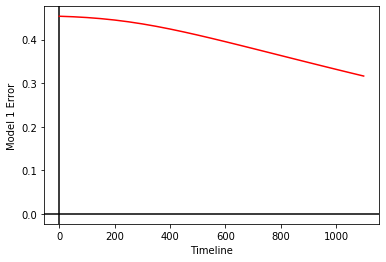

In [134]:
size = len(error1)

x1_time = np.zeros(size)
y1_error= np.zeros(size) 

for i in range(0, size):
    x1_time[i] = timeline1[i]
    y1_error[i] = error1[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 1 Error')
plt.plot(x1_time, y1_error, color="red")

## Model 2: Create A Conversion Matrix

##### We keep all y-values equal to 0 as 1 and we convert all y-values equal to 1 or -1 to 0

In [135]:
holder = train_y 
Con2 = np.copy(holder)
Con2 = Con2.reshape(holder.shape[0])

#print(Con2.shape)
#print(Con2)
#print(Con2[19])
#print(Con2[33])

#Check if there are instances of -1 in dataset
if "-1" in Con2:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')
    
#Change all 0's to 1's, and change all 1's and -1's to 0's
for x in range(Con2.shape[0]):    
    if Con2[x] == "0":
        Con2[x] = 1
    elif Con2[x] == "1" or Con2[x] == "-1":
        Con2[x] = 0         

#Check that theres no instances of -1 in dataset
if "-1" in Con2:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
                
#print(Con2)
#print(Con2[19])
#print(Con2[33])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


## Logistic Regression For Model 2

In [136]:
thetas2= np.ones(train_x.shape[1]) # initialize our parameters
thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas2)
print(thetas_old)
print(thetas2.shape)
print(thetas_old.shape)

model2_y = np.array(Con2,dtype = np.float64)
model2_y = model2_y.reshape(811,1)
print(model2_y[0])
print(model2_y.shape)
X2 = np.array(train_x, dtype = np.float64)  
print(X2[0])
print(X2.shape)

error2 = []
timeline2 = []
iterations2 = 0

while np.linalg.norm(abs(thetas2 - thetas_old)) > tol:
    thetas_old = thetas2
    for i in range(X2.shape[0]): 
        thetas2 = thetas2 - l_rate*( (h(X2[i], thetas2) - model2_y[i]) * X2[i] )
        
    if iterations2%50 == 0:                              
        j = 0.5 * pow(model2_y[i] - h(X2[i], thetas2), 2) 
        error2.append(j)
        timeline2.append(iterations2)   
        #print("Error:" + str(error2))
        #print("Timeline: " + str(timeline2))
        #print()       

    iterations2 = iterations2+1   
        
print(iterations2)        
print("Model Parameters: ", thetas2)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[0.]
(811, 1)
[-1.  0.  0. -1. -1. -1.  0.  1.  0.]
(811, 9)
997
Model Parameters:  [-0.64308854  0.99280921 -0.27996497  0.51545808  0.14451506  0.70645578
  0.63399455  0.37679674  0.51412155]


### Plot Model 2 error

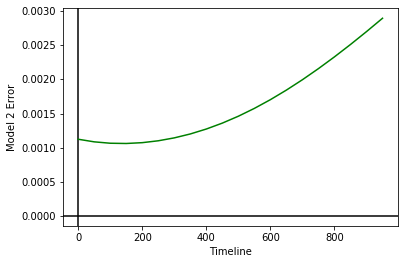

In [137]:
size = len(error2)

x2_time = np.zeros(size)
y2_error= np.zeros(size) 

for i in range(0, size):
    x2_time[i] = timeline2[i]
    y2_error[i] = error2[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 2 Error')
plt.plot(x2_time, y2_error, color="green")

## Model 3: Create A Conversion Matrix

##### We keep all y-values equal to -1 as 1 and we convert all y-values equal to 1 or 0 to 0

In [138]:
holder = train_y 
Con3 = np.copy(holder)
Con3 = Con3.reshape(holder.shape[0])

#print(Con3.shape)
#print(Con3)
#print(Con3[1])
#print(Con3[2])

#Check if there are instances of -1 in dataset
if "-1" in Con3:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')
    print(Con3)
    
#Change all -1's to 1's, and change all 1's and 0's to 0
for x in range(Con3.shape[0]):    
    if Con3[x] == "-1":
        Con3[x] = 1
    elif Con3[x] == "1" or Con3[x] == "0":
        Con3[x] = 0

#Check that theres no instances of -1 in dataset
if "-1" in Con3:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
        
#print(Con3)
#print(Con3[1])
#print(Con3[2])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


In [139]:
thetas3= np.ones(train_x.shape[1]) # initialize our parameters
thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas3)
print(thetas_old)
print(thetas3.shape)
print(thetas_old.shape)

model3_y = np.array(Con3,dtype = np.float64)
model3_y = model3_y.reshape(811,1)
print(model3_y[0])
print(model3_y.shape)
X3 = np.array(train_x, dtype = np.float64)  
print(X3[0])
print(X3.shape)

error3 = []
timeline3 = []
iterations3 = 0

while np.linalg.norm(abs(thetas3 - thetas_old)) > 0.0005:
    thetas_old = thetas3
    for i in range(X3.shape[0]): 
        thetas3 = thetas3 - l_rate*( (h(X3[i], thetas3) - model3_y[i]) * X3[i] )
  
    if iterations3%20 == 0:                              
        j = 0.5 * pow(model3_y[i] - h(X3[i], thetas3), 2) 
        error3.append(j)
        timeline3.append(iterations3)   
        #print("Error:" + str(error3))
        #print("Timeline: " + str(timeline3))
        #print()       

    iterations3 = iterations3 + 1   
        
print(iterations3)        
print("Model Parameters: ", thetas3) 

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[0.]
(811, 1)
[-1.  0.  0. -1. -1. -1.  0.  1.  0.]
(811, 9)
1161
Model Parameters:  [1.27938087 1.27436731 1.13355143 0.95492929 0.61950236 0.79860528
 0.53487387 0.83213639 0.83134027]


### Plot Model 3 error

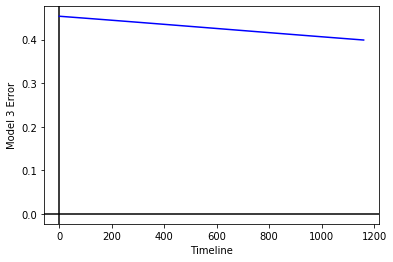

In [140]:
size = len(error3)

x3_time = np.zeros(size)
y3_error= np.zeros(size) 

for i in range(0, size):
    x3_time[i] = timeline3[i]
    y3_error[i] = error3[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 3 Error')
plt.plot(x3_time, y3_error, color="blue")

In [141]:
#Prints the predicted parameters for each model

print('Predicted Paramters For Model 1 ', thetas1)
print('Predicted Paramters For Model 2 ', thetas2)
print('Predicted Paramters For Model 3 ', thetas3)

Predicted Paramters For Model 1  [-1.09815345 -0.16425357 -0.78077276  0.17965566 -0.18048802  1.01141093
  0.01677527  0.21858737  0.7547205 ]
Predicted Paramters For Model 2  [-0.64308854  0.99280921 -0.27996497  0.51545808  0.14451506  0.70645578
  0.63399455  0.37679674  0.51412155]
Predicted Paramters For Model 3  [1.27938087 1.27436731 1.13355143 0.95492929 0.61950236 0.79860528
 0.53487387 0.83213639 0.83134027]


#Plugs in thetas and training data to softmax function (Although not too sure about these values)

probability_m1 = f(X,thetas1)
probability_m2 = f(X2,thetas2)
probability_m3 = f(X3,thetas3)

print(probability_m1)
print(probability_m2)
print(probability_m3)

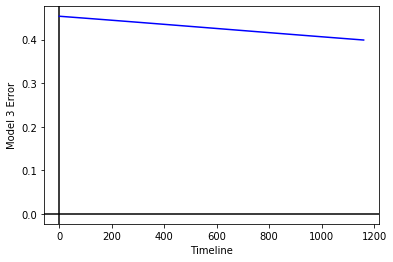

In [142]:
size = len(error3)

x3_time = np.zeros(size)
y3_error= np.zeros(size) 

for i in range(0, size):
    x3_time[i] = timeline3[i]
    y3_error[i] = error3[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 3 Error')
plt.plot(x3_time, y3_error, color="blue")

In [143]:
#Prints the predicted parameters for each model

print('Predicted Paramters For Model 1 ', thetas1)
print('Predicted Paramters For Model 2 ', thetas2)
print('Predicted Paramters For Model 3 ', thetas3)

Predicted Paramters For Model 1  [-1.09815345 -0.16425357 -0.78077276  0.17965566 -0.18048802  1.01141093
  0.01677527  0.21858737  0.7547205 ]
Predicted Paramters For Model 2  [-0.64308854  0.99280921 -0.27996497  0.51545808  0.14451506  0.70645578
  0.63399455  0.37679674  0.51412155]
Predicted Paramters For Model 3  [1.27938087 1.27436731 1.13355143 0.95492929 0.61950236 0.79860528
 0.53487387 0.83213639 0.83134027]


In [144]:
#Defines Softmax function

def f(X): # softmax function

    return np.exp(X) / np.sum(np.exp(X))

#Plugs in thetas and training data to softmax function (Although not too sure about these values)

#for x in range(len(X)):
    #predictedOut
print(X[1])    
y_mat = []
y_mat.append(1/np.dot(thetas1,X[796])) 
y_mat.append(1/np.dot(thetas2,X[796]))
y_mat.append(1/np.dot(thetas3,X[796])) 

print(train_y[796])

print(y_mat)
probs = f(y_mat)
print(probs)
print(max(probs))
#print(sum(probs))

In [145]:
y_mat = []
classification = []
probs=([])
for o in range(len(train_x)):
    y_mat.append(np.dot(thetas1,X[o])) 
    y_mat.append(np.dot(thetas2,X[o]))
    y_mat.append(np.dot(thetas3,X[o]))
    
    probs = f(y_mat)
    print(probs)
    maxPos = np.argmax(probs)
    print(maxPos)
    
    if maxPos == 0:
        classification.append(1)
    elif maxPos == 1:
        classification.append(0)
    elif maxPos == 2:    
        classification.append(-1)
    
    y_mat = []

print(classification)    

[0.63917832 0.33277866 0.02804302]
0
[0.01054956 0.01803615 0.97141429]
2
[0.73438744 0.2172665  0.04834606]
0
[0.12308959 0.06089349 0.81601692]
2
[0.00479693 0.01932219 0.97588088]
2
[0.95337453 0.04522482 0.00140066]
0
[0.00754484 0.04176746 0.95068769]
2
[0.74342417 0.24238805 0.01418778]
0
[0.83829339 0.12303846 0.03866816]
0
[0.0062989  0.01996315 0.97373795]
2
[0.02785053 0.15175973 0.82038974]
2
[0.01061573 0.01062216 0.97876212]
2
[0.06039407 0.07142129 0.86818463]
2
[0.93077851 0.06806681 0.00115468]
0
[0.74100318 0.20161361 0.05738322]
0
[9.48380552e-01 5.07524609e-02 8.66986831e-04]
0
[0.61329523 0.24897516 0.13772961]
0
[0.68757401 0.21346152 0.09896447]
0
[0.0439708  0.05062969 0.90539951]
2
[0.01175611 0.01911429 0.96912961]
2
[0.8572875  0.13339592 0.00931658]
0
[0.68981177 0.27104802 0.0391402 ]
0
[0.00228377 0.01602115 0.98169508]
2
[0.95053911 0.04561019 0.0038507 ]
0
[0.40241893 0.20512988 0.39245119]
0
[0.02823874 0.0457231  0.92603816]
2
[7.29468078e-04 1.08224461

[0.93736834 0.06076285 0.00186881]
0
[0.00567198 0.02319125 0.97113677]
2
[0.02559263 0.05167157 0.9227358 ]
2
[0.03333105 0.04448519 0.92218376]
2
[0.01693314 0.05082562 0.93224124]
2
[0.02284858 0.05018685 0.92696456]
2
[0.00935171 0.03816266 0.95248563]
2
[0.83221685 0.08394017 0.08384298]
0
[0.90848074 0.09012497 0.00139429]
0
[0.85574034 0.09133375 0.0529259 ]
0
[0.45163416 0.32711833 0.22124751]
0
[0.88795056 0.1109493  0.00110014]
0
[0.66242018 0.18623979 0.15134003]
0
[0.55008054 0.21952384 0.23039562]
0
[0.46225618 0.16917854 0.36856528]
0
[0.27511475 0.12234911 0.60253614]
2
[0.81643197 0.07093447 0.11263356]
0
[0.71303114 0.19862358 0.08834527]
0
[0.00305954 0.02905998 0.96788048]
2
[0.88567643 0.10687157 0.00745199]
0
[0.01592407 0.03757584 0.94650009]
2
[0.00337811 0.02560462 0.97101727]
2
[0.88795056 0.1109493  0.00110014]
0
[0.0062989  0.01996315 0.97373795]
2
[0.00314997 0.00738983 0.9894602 ]
2
[0.68757401 0.21346152 0.09896447]
0
[0.01978895 0.02506167 0.95514938]
2
[

[0.73486134 0.20425173 0.06088693]
0
[0.06631656 0.0414937  0.89218974]
2
[0.45928541 0.11194818 0.4287664 ]
0
[0.00150909 0.01521194 0.98327897]
2
[0.01203844 0.01978586 0.9681757 ]
2
[0.78654415 0.18645488 0.02700098]
0
[0.91365698 0.08067811 0.00566492]
0
[4.89932444e-04 6.72746523e-03 9.92782602e-01]
2
[0.53957303 0.26825544 0.19217153]
0
[0.84104157 0.150795   0.00816343]
0
[0.2354084  0.19210342 0.57248819]
2
[0.0012253  0.00980633 0.98896837]
2
[0.489777   0.24470464 0.26551836]
0
[0.85174426 0.14497385 0.00328189]
0
[0.00100193 0.01780519 0.98119288]
2
[0.06039407 0.07142129 0.86818463]
2
[0.75643255 0.23867426 0.0048932 ]
0
[0.8808891  0.10562517 0.01348573]
0
[0.00172481 0.01671423 0.98156096]
2
[0.00798633 0.00852236 0.98349131]
2
[0.01110609 0.03449999 0.95439392]
2
[0.47749927 0.17900135 0.34349938]
0
[0.48099021 0.06895593 0.45005386]
0
[9.48380552e-01 5.07524609e-02 8.66986831e-04]
0
[0.20909871 0.07774613 0.71315516]
2
[0.0012253  0.00980633 0.98896837]
2
[0.01265159 0.

[0.81249406 0.10024523 0.08726071]
0
[0.00513988 0.02633521 0.96852491]
2
[6.45998193e-04 1.18810397e-02 9.87472962e-01]
2
[0.8808891  0.10562517 0.01348573]
0
[6.45998193e-04 1.18810397e-02 9.87472962e-01]
2
[0.13485977 0.09295329 0.77218694]
2
[0.59796034 0.1180538  0.28398586]
0
[0.9126159  0.08117734 0.00620676]
0
[0.45053696 0.44084361 0.10861942]
0
[0.00702194 0.02116444 0.97181362]
2
[0.21993151 0.07164619 0.7084223 ]
2
[0.74100318 0.20161361 0.05738322]
0
[0.84192369 0.1226714  0.03540491]
0
[0.0937001  0.06334381 0.84295609]
2
[0.96510591 0.03374799 0.0011461 ]
0
[0.24213913 0.11929169 0.63856918]
2
[0.00228377 0.01602115 0.98169508]
2
[0.03064119 0.05333196 0.91602685]
2
[0.02785053 0.15175973 0.82038974]
2
[0.01801829 0.07059596 0.91138575]
2
[0.18100722 0.21069994 0.60829284]
2
[0.54932804 0.09342075 0.35725121]
0
[0.93448822 0.06082835 0.00468343]
0
[0.62530514 0.26334949 0.11134537]
0
[0.06625144 0.0722135  0.86153506]
2
[0.96510591 0.03374799 0.0011461 ]
0
[0.10113533 0.

In [146]:
print(train_y)

1067     1
750     -1
775      1
223     -1
295     -1
        ..
161     -1
55      -1
980     -1
668     -1
169      0
Name: Class, Length: 811, dtype: object


In [147]:
count = 0
train_yy = np.array(train_y, dtype = np.float64)  
for d in range (len(train_yy)):
    if classification[d] == train_yy[d]:
        count = count+1
print(count)
print(len(train_y))
accuracy = count/len(train_y)
print(accuracy)

654
811
0.8064118372379778
